# <span style="color:rgb(160,0,86)">Schätzverfahren</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie kennen den **zentralen Grenzwertsatz** und können die passende **Normalverteilung** in die Stichprobenverteilung zeichnen. 
- Sie kennen Eigenschaften von **Schätzverfahren**.
- Sie können **Punktschätzer** von **Interallschätzern** unterscheiden.  
- Sie können für wichtige Parameter diese **Schätzer berechnen**.  

***

### <span style="color:rgb(160,0,86)">Was ist der zentrale Grenzwertsatz?</span>

In der letzten Serie haben wir **Mittelwerte aus 1000 Zufallsstichproben** berechnet und die empirische Verteilung gezeichnet:
- Die Verteilung hat eine **Glockenform**.
- Die Verteilung **wird für grössere Stichproben schmaler**.

Der deutsche Mathematiker ***Carl Friedrich Gauss*** (1777-1855) hat die Berechung für diese **Normalverteilung** entdeckt. Der alte 10 DM-Schein (seit 1991 im Umlauf) wurde Gauss gewidmet und seine ***Glockenkurve mit Formel*** abgebildet:  

<center>
<img src="Bilder/Gauss.png" width="55%" />
</center>

Eine **normalverteile Zufallsvariable** $\,\pmb{X}\,$ gibt Werte aus $\mathbb{R}$ zurück. Ihre Dichte wird gemäss folgender Formel berechnet: $$\text{Dichte}(x)=\texttt{X.pdf(x)} = \frac{1}{\sigma\cdot\sqrt{2\pi}}\cdot e^{-\frac{(x-\mu)^2}{2\,\cdot\,\sigma^2}}$$
Die Parameter <tt>loc</tt> und <tt>scale</tt> in der Funktion **norm( )** aus dem Modul **SciPy** bestimmen die Lage und Form der Kurve: 
- <tt>loc</tt> ist der **Erwartungswert** $\,\pmb{\mu}\,$ der Zufallsvariable $\,\pmb{X}\,$. 
- <tt>scale</tt> ist die **Standardabweichung** $\,\pmb{\sigma}\,$ der Zufallsvariable $\,\pmb{X}\,$.

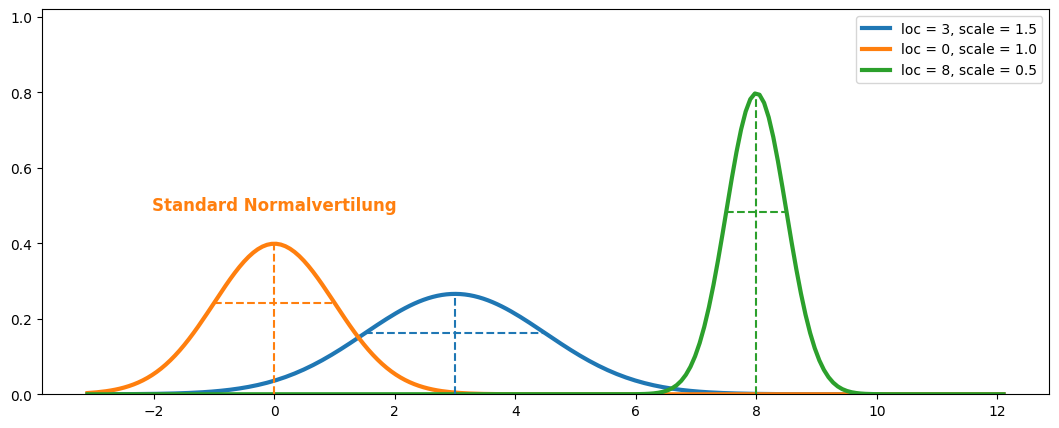

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Zufallsvariable definieren
X_1 = norm(loc=3,scale=1.5)
X_2 = norm(loc=0,scale=1)   # Standard Normalverteilung
X_3 = norm(loc=8,scale=0.5)

# Probability Density Function
x = np.linspace(-3.1,12.1,200) # x-Koordinaten
X_pdf_1 = X_1.pdf(x)           # y-Koordinaten
X_pdf_2 = X_2.pdf(x)           # y-Koordinaten
X_pdf_3 = X_3.pdf(x)           # y-Koordinaten

fig = plt.figure(figsize=(13,5))

# Zugriff auf Standardfarben (Tableau 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

axi = fig.add_subplot(1,1,1)
axi.plot(x,X_pdf_1,lw=3)
axi.plot(x,X_pdf_2,lw=3)
axi.plot(x,X_pdf_3,lw=3)

plt.text(0, 0.5, 'Standard Normalvertilung', 
         fontsize=12,
         fontweight='bold',
         color=colors[1],
         horizontalalignment='center',
         verticalalignment='center')
axi.set_ylim(0,1.02)
axi.legend(["loc = 3, scale = 1.5",
            "loc = 0, scale = 1.0",
            "loc = 8, scale = 0.5"])

# Linien für die Erwartungswerte 
axi.vlines(X_1.mean(),0,X_1.pdf(X_1.mean()),
           color=colors[0],linestyle="dashed")
axi.vlines(X_2.mean(),0,X_2.pdf(X_2.mean()),
           color=colors[1],linestyle="dashed")
axi.vlines(X_3.mean(),0,X_3.pdf(X_3.mean()),
           color=colors[2],linestyle="dashed")

# Linien für die Standardabweichungen 
axi.hlines(X_1.pdf(X_1.mean()-X_1.std()),
           X_1.mean()-X_1.std(),X_1.mean()+X_1.std(),
           color=colors[0],linestyle="dashed")
axi.hlines(X_2.pdf(X_2.mean()-X_2.std()),
           X_2.mean()-X_2.std(),X_2.mean()+X_2.std(),
           color=colors[1],linestyle="dashed")
axi.hlines(X_3.pdf(X_3.mean()-X_3.std()),
           X_3.mean()-X_3.std(),X_3.mean()+X_3.std(),
           color=colors[2],linestyle="dashed")

plt.show()

Der finnische Mathematiker ***Jarl Waldemar Lindeberg*** (1876–1932) und der französischen Statistiker ***Paul Lévy*** (1886–1971) haben eine  **wichtige Eigenschaft von Stichprobenmittelwerten** bewiesen.

<center>
<img src="Bilder/LevyLindeberg.png" width="60%" />
</center>

Diese folgenden Eigenschaften, zusammengefasst im sogenannten <span style="color:rgb(160,0,86)">***Zentralen Grenzwertsatz***</span>, können in der Mathematik streng und exakt bewiesen werden. 

- Die Verteilung von Stichprobenmittelwerten aus mehreren Zufallsstichproben ähnelt immer genauer der Normalverteilung (Glockenkurve von Gauss), wenn die Grösse $n$ der Zufallsstichproben gross wird: $$\left.\begin{array}{c}\textbf{Verteilung von Stichprobenmittelwerten} \\ \textbf{aus grossen Zufallsstichproben}\end{array}\;\,\right\} \;\sim\;\, \textbf{Normalverteilung}$$ Dabei spielt die Verteilung in der Grundgesamtheit keine Rolle, diese muss selbst nicht normalverteilt sein.
- Die Stichprobenmittelwerte liegen um die gleiche Lage wie der Mittelwert in der Grundgesamtheit: $$\left.\begin{array}{c}\textbf{mittlere Lage der}\\ \textbf{Stichprobenmittelwerte}\end{array}\;\,\right\} \;\,=\,\;\left\{\;\,\begin{array}{c}\textbf{mittlere Lage der}\\ \textbf{Daten in der Grundgesamtheit}\end{array}\right.$$ 
- Mit zunehmender Grösse $n$ der Zufallsstichproben nimmt die Streuung der Stichprobenmittelwerte ab: $$\left.\begin{array}{c}\textbf{Streuung der}\\ \textbf{Stichprobenmittelwerte}\end{array}\;\,\right\} \;\,=\,\; \frac{\textbf{Streuung in der Grundgesamtheit}}{\sqrt{\textbf{Grösse der Zufallsstichproben}}}$$

Betrachen wir noch einmal die ***Jahreseinkommen von Kreditantragstellern*** bei **Lending Club** und zeihen **Stichproben** der Grösse $\,\pmb{n=25}\,$ und $\,\pmb{n=400}\,$:

In [29]:
import numpy as np
import pandas as pd

income = pd.read_csv("Daten/loans_income.csv")

stichprobenmittelwerte_25 = [np.random.choice(income["x"],
                                             size=25,
                                             replace=False).mean()
                            for _ in range(1000)]

stichprobenmittelwerte_400 = [np.random.choice(income["x"],
                                              size=400,
                                              replace=False).mean() 
                            for _ in range(1000)]

- Nach dem ***zenralen Grenzwertsatz*** sollten die **mittlere Lage der Stichprobenmittelwerte** mit der **mittleren Lage der Grundgesamtheit** übereinstimmen: 

In [36]:
mittelwert_G = income["x"].mean()

mittelwert_25 = np.array(stichprobenmittelwerte_25).mean()
mittelwert_400 = np.array(stichprobenmittelwerte_400).mean()

print("Mittlerer Lohn in der Grundgesamtheit                :", 
      round(mittelwert_G,2))
print("Mittlere Lage der Stichprobenmittelwerte mit n = 25  :", 
      round(mittelwert_25,2))
print("Mittlere Lage der Stichprobenmittelwerte mit n = 400 :", 
      round(mittelwert_400,2))

Mittlerer Lohn in der Grundgesamtheit                : 68760.52
Mittlere Lage der Stichprobenmittelwerte mit n = 25  : 68388.86
Mittlere Lage der Stichprobenmittelwerte mit n = 400 : 68758.96


- Nach dem ***zenralen Grenzwertsatz*** sollten die **Streuung der Stichprobenmittelwerte** mit der **Streuung der Grundgesamtheit dividiert durch die Wurzel aus der Stichprobengrösse** übereinstimmen: 

In [38]:
std_G = income["x"].std(ddof=0)

std_25 = np.array(stichprobenmittelwerte_25).std(ddof=0)
std_400 = np.array(stichprobenmittelwerte_400).std(ddof=0)

print("Streuung der Stichprobenmittelwerte mit n = 25       :", 
      round(std_25,2))
print("Streuung in der Grundgesamtheit durch Wurzel von 25  :", 
      round(std_G/np.sqrt(25),2))
print("Streuung der Stichprobenmittelwerte mit n = 400      :", 
      round(std_400,2))
print("Streuung in der Grundgesamtheit durch Wurzel von 400 :", 
      round(std_G/np.sqrt(400),2))

Streuung der Stichprobenmittelwerte mit n = 25       : 6518.53
Streuung in der Grundgesamtheit durch Wurzel von 25  : 6574.34
Streuung der Stichprobenmittelwerte mit n = 400      : 1654.4
Streuung in der Grundgesamtheit durch Wurzel von 400 : 1643.59


### <span style="color:rgb(160,0,86)">Was sind Schätzverfahren?</span>

Die **Schätztheorie** ist ein Teilgebiet der Statistik. Mit mathematischen Verfahren sollen *unbekannte Verteilungsparameter* (mittlere Lage, Streuung, etc.) einer Grundgesamtheit auf Basis von Zufallsstichproben *geschätzt werden*. 

<span style="color:rgb(160,0,86)">***Bemerkung:***</span> 
- Die **Kennzahlen in der Grundgesamtheit** werden oft mit ***griechischen Buchstaben*** bezeichnet.
- Als **Bezeichung für die geschätzen Werte** brauchen wir oft die gleichen Symbole, aber mit einem ***Hausdach*** $\;\hat{ }\;$ über dem Symbol! 

Es wird zwischen **Punktschätzugen** und **Intervallschätzungen** unterschieden.

<span style="color:rgb(160,0,86)">***Punktschätzer:***</span> Ein Punktschätzer gibt **einen einzelnen Wert** als Schätzung für einen unbekannten Parameter an.

- *Beispiel:* Der **Mittelwert** $\pmb{\bar{x}}$ einer Stichprobe als Schätzung $\pmb{\hat{\mu}}$ für den wahren **Mittelwert** $\pmb{\mu}$ der Grundgesamtheit. Die **relative Häufigkeit** $\pmb{h(\;)}$ in einer Stichprobe als Schätzung $\pmb{\hat{\pi}}$ für die tatsächliche **Häfigkeit** $\pmb{\pi}$ in der Grundgesamtheit.
- *Vorteil:* ***Einfach und direkt interpretierbar.***
- *Nachteil:* ***Enthält keine Information über die Unsicherheit der Schätzung.***

Ein Punktschätzer ist wie eine einzelne Zahl auf einer Zielscheibe – er ***kann genau treffen*** oder ***danebenliegen***.


<span style="color:rgb(160,0,86)">***Intervallschätzer:***</span> Ein Intervallschätzer gibt **ein Intervall** an, in dem der wahre Parameter mit einer bestimmten Wahrscheinlichkeit liegt.

- *Beispiel:* Ein **95%-Konfidenzintervall** $\pmb{[\bar{x}_{\text{min}},\bar{x}_{\text{max}}]}$ für den Mittelwert gibt an, in welchem Bereich der wahre Mittelwert $\pmb{\mu}$ der Grundgesamtheit mit einer Wahrscheinlichkeit von 95% liegt.
- *Vorteil:* ***Enthält Informationen über die Unsicherheit der Schätzung.***
- *Nachteil:* ***Komplexer als ein einzelner Punktwert.***

Ein Intervallschätzer ist wie ein Zielfernrohr, das eine gewisse Streuung zulässt – es gibt ***nicht nur eine Zahl***, sondern ***einen Bereich möglicher Werte*** an.

### <span style="color:rgb(160,0,86)">Wie werden Punktschätzer festgelet?</span>

Häufig werden Punktschätzer mit einer der folgenden Methoden bestimmt.

<span style="color:rgb(160,0,86)">***Kleinste-Quadrate-Schätzung LSE:***</span>

Man macht keine Annahmen über die Verteilung in der Grundgesamtheit und zieht eine Zufallsstichprobe $x_1,x_2,\ldots,x_n$. 

- <span style="color:rgb(160,0,86)">***Ziel:***</span> Die **Summe der quadrierten Fehler** $\mathsf{SSE}$ (**S**um of **S**quared **E**rrors) zwischen den beobachteten Werten und dem vorhergesagten Wert werden minimiert. <br> Der **Schätzer** $\pmb{\hat{\mu}}$ für den Mittelwert $\pmb{\mu}$ einer Grundgesamtheit hat zum Beispiel die Eigenschaft, dass für die gegebene Stichprobe die Zahl $$\mathsf{SSE}(\pmb{\hat{\mu}})=(x_1-\pmb{\hat{\mu}})^2 + (x_2-\pmb{\hat{\mu}})^2 + (x_3-\pmb{\hat{\mu}})^2 + \cdots + (x_n-\pmb{\hat{\mu}})^2$$ minimal ist. Mit den Methoden der Analysis folgt, dass $$\pmb{\hat{\mu}} = \frac{1}{n}(x_1 + x_2 + x_3 + \cdots + x_n)$$ gerechnet werden muss. Der Mittelwert $\pmb{\mu}$ wird also mit dem **arithmetischen Mittel** geschätzt.


<span style="color:rgb(160,0,86)">***Maximum-Likelihood-Schätzung MLE:***</span>

Man nimmt an, dass die Daten der Grundgesamtheit aus einer bestimmten Verteilung stammen (z.B. Normalverteilung, Binomialverteilung, Poissonverteilung etc.) und zieht eine Zufallsstichprobe $x_1,x_2,\ldots,x_n$. Der Parameter $\pmb{\mu}$ dieser Verteilung ist aber unbekannt.  

- <span style="color:rgb(160,0,86)">***Ziel:***</span> Wenn man zum Beispiel davon aus geht, dass die Daten Normalverteilt sind, dann gibt die sogenannte **Likelihood-Funktion** $$L(\pmb{\hat{\mu}})=
\underbrace{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x_1-\pmb{\hat{\mu}})^2}{2\sigma^2}}}_{P(X_1=x_1)\rule{0cm}{0.55cm}}\cdot
\underbrace{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x_2-\pmb{\hat{\mu}})^2}{2\sigma^2}}}_{P(X_2=x_2)\rule{0cm}{0.55cm}}\cdot
\underbrace{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x_3-\pmb{\hat{\mu}})^2}{2\sigma^2}}}_{P(X_3=x_3)\rule{0cm}{0.55cm}}\cdot\ldots
\underbrace{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x_n-\pmb{\hat{\mu}})^2}{2\sigma^2}}}_{P(X_n=x_n)\rule{0cm}{0.55cm}}\cdot$$ an, wie wahrscheinlich die Daten $x_1,x_2,\ldots,x_n$ der Stichprobe mit einem **Schätzer** $\pmb{\hat{\mu}}$ für den Mittelwert $\pmb{\mu}$ der gewählten Verteilung sind. Den Schätzer $\pmb{\hat{\mu}}$ für den Parameter $\pmb{\mu}$ bestimmt man so, dass die Likelihood-Funktion $L$ am grössten ist. Das bedeutet also, dass der Parameter $\pmb{\hat{\mu}}$ die beobachteten Daten am wahrscheinlichsten erklärt.  Mit den Methoden der Analysis folgt, dass $$\pmb{\hat{\mu}} = \frac{1}{n}(x_1 + x_2 + x_3 + \cdots + x_n)$$ gerechnet werden muss. Der Mittelwert $\pmb{\mu}$ muss also auch mit dem **arithmetischen Mittel** geschätzt werden.


### <span style="color:rgb(160,0,86)">Welche Eigenschaften sollten Punktschätzer haben?</span>

- Eine Schätzer $\,\pmb{\hat{\theta}_n}\,$ heisst **konsistent**, wenn mit zunehmendem Stichprobenumfang $n$ grosse Abweichungen zwischen dem wahren Parameter $\,\pmb{\theta}\,$ und dem geschätzten Parameter $\,\pmb{\hat{\theta}_n}\,$ immer seltener werden: $$\pmb{\lim_{n\to \infty}P(|\hat{\theta}_n-\theta|<\varepsilon) = 1} \;\;\text{ für beliebig kleine }\,\pmb{\varepsilon > 0}$$

- Ein Schätzer $\,\pmb{\hat{\theta}}\,$ heisst **erwartungstreu**, wenn er im Mittel über alle Stichproben den wahren Parameter $\,\pmb{\theta}\,$ richtig schätzt: $$\pmb{E_{\text{ über alle Stichproben }}(\hat{\theta}) = \theta}
$$

Der ***Stichprobenmedian*** ist der Median der geordneten Stichprobe. Er ist im Allgemeinen **nicht erwartungstreu** für den wahren Median der Grundgesamtheit, dennoch ist er **konsistent**, das heisst, für grosse Stichproben nähert er sich dem wahren Median an.

### <span style="color:rgb(160,0,86)">Aufgabe 1</span>

Wir betrachten eine kleine Grundgesamtheit von 5 Personen:

$$\begin{array}{c|cccc}
&\text{PKW-Besitz }Y&\text{Einkünfte }X\\ \hline 
\text{Person A}&1&800\\
\text{Person B}&0&600\\
\text{Person C}&1&900\\
\text{Person D}&1&800\\
\text{Person E}&0&700\\
\end{array}$$

Aus dieser Grundgesamtheit wird eine Stichprobe $$\begin{array}{c|cccc}
&\text{PKW-Besitz }Y&\text{Einkünfte }X\\ \hline 
\text{Person 1}&y_1&x_1\\
\text{Person 2}&y_2&x_2\\
\end{array}$$ vom Umfang $n=2$, um den **Anteil PKW-Besitzer** $\pmb{\pi}$, die **durchschnittlichen Einkünfte** $\pmb{\mu}$ und die **mittlere quadratische Abweichung** $\pmb{\sigma^2}$ zu schätzen. 

Es werden folgende Schätzer verwendet:
- $\displaystyle\pmb{\hat{\pi}}=\frac{1}{2}(y_1+y_2)$
- $\displaystyle\pmb{\hat{\mu}}=\frac{1}{2}(x_1+x_2)\rule{0cm}{1.5cm}$
- $\displaystyle\pmb{\hat{\sigma}^2}=\frac{1}{2}\big((x_1-\pmb{\hat{\mu}})^2+(x_2-\pmb{\hat{\mu}})^2)\big)\rule{0cm}{1.5cm}$

1) Bestimmen Sie die wahren Parameter $\pmb{\pi}$, $\pmb{\mu}$ und $\pmb{\sigma^2}$ in der Grundgesamtheit.
2) Bestimmen Sie die Schätzungen der Parameter für alle möglichen Stichproben ***mit*** zurücklegen.
3) Bestimmen Sie die Schätzungen der Parameter für alle möglichen Stichproben ***ohne*** zurücklegen.
4) Sind die Schätzer bei 2) und 3) **erwartungstreu**?

***

### <span style="color:rgb(160,0,86)">Lösungsvorschlag</span>

Diese Aufgabe kann auch von Hand gelöst werden. Eine Lösung mit Python finden wir zum Beispiel wie folgt: 

Speichern wir die **Daten der Grundgesamtheit** in einem *DataFrame* von pandas: 

In [1]:
personen = ["A","B","C","D","E"]
pkw_Besitz = [1,0,1,1,0]
einkünfte = [800,600,900,800,700]

import pandas as pd
grundgesamtheit = pd.DataFrame({"Personen":personen,
                                "PKW":pkw_Besitz,
                                "Einkünfte":einkünfte})

grundgesamtheit.set_index("Personen",inplace=True)
grundgesamtheit

,PKW,Einkünfte
Personen,,
A,1,800
B,0,600
C,1,900
D,1,800
E,0,700


Die **wahren Paramter** $\pmb{p}$, $\pmb{\mu}$ und $\pmb{\sigma^2}$ in der Grundgesamtheit sind:

In [2]:
import numpy as np

p = grundgesamtheit["PKW"].mean()
mu = grundgesamtheit["Einkünfte"].mean()
sigmaSQ = grundgesamtheit["Einkünfte"].var(ddof=0)

print("Mittlerer PKW-Anteil: p =",np.round(p,1))
print("Mittlere Einkünfte: mu =",np.round(mu,1))
print("Mittlere Quadratische Abweichung der Einkünfte: sigmaSQ =",
      np.round(sigmaSQ,1))

Mittlerer PKW-Anteil: p = 0.6
Mittlere Einkünfte: mu = 760.0
Mittlere Quadratische Abweichung der Einkünfte: sigmaSQ = 10400.0


Nun bestimmen wir die ***Schätzungen*** $\pmb{\hat{p}}$, $\pmb{\hat{\mu}}$ und $\pmb{\hat{\sigma}^2}$ für alle Stichproben der Grösse $n=2$ **mit Zurücklegen** und **ohne Zurücklegen**:

In [34]:
# Wir sammeln alle Stichproben und Schätzer in Listen

# Initialisierung
stichproben_mZ = []
schätzungen_p = []
schätzungen_mu = []
schätzungen_sigmaSQ = []

# Berechnung der Schätzer
for i in grundgesamtheit.index: 
    # i: 1. Person in der Stichprobe
    for j in grundgesamtheit.index: 
        # j: 2. Person in der Stichprobe

        # "ij" als Name für die Stichprobe (z.B. AD)
        stichproben_mZ.append(i+j) 
        
        # Schätzungen aus der Stichprobe berechnen und speichern  
        schätzungen_p.append( 
                 1/2*(grundgesamtheit.loc[i,"PKW"] +
                      grundgesamtheit.loc[j,"PKW"]) )
        mu_hat = 1/2*(grundgesamtheit.loc[i,"Einkünfte"] +
                      grundgesamtheit.loc[j,"Einkünfte"])
        schätzungen_mu.append(mu_hat)
        schätzungen_sigmaSQ.append(
                 1/2*((grundgesamtheit.loc[i,"Einkünfte"] - mu_hat)**2 +
                      (grundgesamtheit.loc[j,"Einkünfte"] - mu_hat)**2))

# Wir speichern alle Stichproben mit den Schätzern in einem pandas DataFrame
schätzungen_mZ = pd.DataFrame({ "Stichprobe"  : stichproben_mZ,
                                "p_hat"       : schätzungen_p,
                                "mu_hat"      : schätzungen_mu,
                                "sigmaSQ_hat" : schätzungen_sigmaSQ })

schätzungen_mZ.set_index("Stichprobe",inplace=True)

# Für die Stichproben ohne Zurücklegen nehmen wir die unerlaubten weg
schätzungen_oZ = schätzungen_mZ.drop(["AA","BB","CC","DD","EE"])

In [4]:
schätzungen_mZ

,p_hat,mu_hat,sigmaSQ_hat
Stichprobe,,,
AA,1.0,800.0,0.0
AB,0.5,700.0,10000.0
AC,1.0,850.0,2500.0
AD,1.0,800.0,0.0
AE,0.5,750.0,2500.0
BA,0.5,700.0,10000.0
BB,0.0,600.0,0.0
BC,0.5,750.0,22500.0
BD,0.5,700.0,10000.0


In [5]:
schätzungen_oZ

,p_hat,mu_hat,sigmaSQ_hat
Stichprobe,,,
AB,0.5,700.0,10000.0
AC,1.0,850.0,2500.0
AD,1.0,800.0,0.0
AE,0.5,750.0,2500.0
BA,0.5,700.0,10000.0
BC,0.5,750.0,22500.0
BD,0.5,700.0,10000.0
BE,0.0,650.0,2500.0
CA,1.0,850.0,2500.0


Nun prüfen wir, ob die Schätzungen $\pmb{\hat{p}}$, $\pmb{\hat{\mu}}$ und $\pmb{\hat{\sigma}^2}$ erwartungstreu sind.

- Mit den Stichproben der Grösse $n=2$ finden wir für $\pmb{\hat{p}}$:

In [6]:
print("Mittel über alle Stichproben ohne Zurücklegen ist", 
      schätzungen_oZ["p_hat"].mean())

print("Mittel über alle Stichproben mit Zurücklegen ist", 
      schätzungen_mZ["p_hat"].mean())

print("Wahre Wert in der Grundgesamtheit ist",p)

Mittel über alle Stichproben ohne Zurücklegen ist 0.6
Mittel über alle Stichproben mit Zurücklegen ist 0.6
Wahre Wert in der Grundgesamtheit ist 0.6


Der Schätzer $\displaystyle\pmb{\hat{p}}=\frac{1}{2}(y_1+y_2)$ für den Anteil $\displaystyle\pmb{p}$ ist sowohl für Stichproben **mit Zurücklegen** als auch für Stichproben **ohne Zurücklegen** ***erwartungstreue***.

- Mit den Stichproben der Grösse $n=2$ finden wir für $\pmb{\hat{\mu}}$:

In [8]:
print("Mittel über alle Stichproben ohne Zurücklegen ist", 
      schätzungen_oZ["mu_hat"].mean())

print("Mittel über alle Stichproben mit Zurücklegen ist", 
      schätzungen_mZ["mu_hat"].mean())

print("Wahre Wert in der Grundgesamtheit ist",mu)

Mittel über alle Stichproben ohne Zurücklegen ist 760.0
Mittel über alle Stichproben mit Zurücklegen ist 760.0
Wahre Wert in der Grundgesamtheit ist 760.0


Der Schätzer $\displaystyle\pmb{\hat{\mu}}=\frac{1}{2}(x_1+x_2)\rule{0cm}{1.5cm}$ für den Mittelwert $\displaystyle\pmb{\mu}$ ist sowohl für Stichproben **mit Zurücklegen** als auch für Stichproben **ohne Zurücklegen** ***erwartungstreue***.


- Mit den Stichproben der Grösse $n=2$ finden wir für $\pmb{\hat{\sigma}^2}$:

In [9]:
print("Mittel über alle Stichproben ohne Zurücklegen ist", 
      schätzungen_oZ["sigmaSQ_hat"].mean())
print("Mittel über alle Stichproben mit Zurücklegen ist", 
      schätzungen_mZ["sigmaSQ_hat"].mean())
print("Wahre Wert in der Grundgesamtheit ist",sigmaSQ)

Mittel über alle Stichproben ohne Zurücklegen ist 6500.0
Mittel über alle Stichproben mit Zurücklegen ist 5200.0
Wahre Wert in der Grundgesamtheit ist 10400.0


Der Schätzer $\displaystyle\pmb{\hat{\sigma}^2}=\frac{1}{2}\big((x_1-\pmb{\hat{\mu}})^2+(x_2-\pmb{\hat{\mu}})^2)\big)\rule{0cm}{1.5cm}$ für die mittlere quadratische Abweichung $\displaystyle\pmb{\sigma^2}$ ist sowohl für Stichproben **mit Zurücklegen** als auch für Stichproben **ohne Zurücklegen** **<span style="color:red">nicht</span>** ***erwartungstreue***.

***
<span style="color:rgb(160,0,86)">**Zusatzbemerkung für Interessierte!**</span>
***

Die folgenden Berechnungen zeigen, dass:  

- der Schätzer $\displaystyle\pmb{\hat{\sigma}_1^2}=\frac{1}{\textcolor{red}{\pmb{n-1}}}\big((x_1-\pmb{\hat{\mu}})^2+\ldots+(x_n-\pmb{\hat{\mu}})^2)\big)\rule{0cm}{0.8cm}$ für Stichproben **mit Zurücklegen** ***erwartungstreu*** ist. <br> Im Beispiel oben haben wir Stichprobengrösse $\,\pmb{n=2}\,$.
- der Schätzer $\displaystyle\pmb{\hat{\sigma}_2^2}=\frac{\textcolor{red}{\pmb{N-1}}}{\textcolor{red}{\pmb{N}}}\cdot\frac{1}{\textcolor{red}{\pmb{n-1}}}\big((x_1-\pmb{\hat{\mu}})^2+\ldots+(x_n-\pmb{\hat{\mu}})^2)\big)\rule{0cm}{1.5cm}$ für Stichproben **ohne Zurücklegen** ***erwartungstreu*** ist. <br> Im Beispiel oben haben wir Stichprobengrösse $\,\pmb{n=2}\,$ und Grundgesamtheitsgrösse $\,\pmb{N=5}\,$.

In [10]:
stichproben_mZ = []
sigmaSQ_1 = []
sigmaSQ_2 = []

for i in grundgesamtheit.index: 
    #i: 1. Person in der Stichprobe
    for j in grundgesamtheit.index: 
        #j: 2. Person in der Stichprobe
        
        #"ij" als Name für die Stichprobe
        stichproben_mZ.append(i+j) 
        
        #Schätzungen aus der Stichprobe berechnen und speichern  
        mu_hat = 1/2*(grundgesamtheit.loc[i,"Einkünfte"] +
                      grundgesamtheit.loc[j,"Einkünfte"])
        sigmaSQ_1.append(
            1/(2-1)*((grundgesamtheit.loc[i,"Einkünfte"] - mu_hat)**2 +
                     (grundgesamtheit.loc[j,"Einkünfte"] - mu_hat)**2) )
        sigmaSQ_2.append(
            (5-1)/5*1/(2-1)*((grundgesamtheit.loc[i,"Einkünfte"] - mu_hat)**2 +
                             (grundgesamtheit.loc[j,"Einkünfte"] - mu_hat)**2) )

schätzungenSigmaSQ_mZ = pd.DataFrame(
                { "Stichprobe" : stichproben_mZ,
                  "sigmaSQ_1"  : sigmaSQ_1,
                  "sigmaSQ_2"  : sigmaSQ_2 } )
schätzungenSigmaSQ_mZ.set_index("Stichprobe",inplace=True)

#Für die Stichproben ohne Zurücklegen nehmen wir die unerlaubten weg
schätzungenSigmaSQ_oZ = schätzungenSigmaSQ_mZ.drop(["AA","BB","CC","DD","EE"])

#Das Mittel über die Stichproben bestätigt die erwartungstreue der Schätzer:
print("Mittel über alle Stichproben mit Zurücklegen ist", 
      schätzungenSigmaSQ_mZ["sigmaSQ_1"].mean())

print("Mittel über alle Stichproben ohne Zurücklegen ist", 
      schätzungenSigmaSQ_oZ["sigmaSQ_2"].mean())

print("Wahre Wert in der Grundgesamtheit ist",sigmaSQ)

Mittel über alle Stichproben mit Zurücklegen ist 10400.0
Mittel über alle Stichproben ohne Zurücklegen ist 10400.0
Wahre Wert in der Grundgesamtheit ist 10400.0


### <span style="color:rgb(160,0,86)">Welche Punktschätzer werden gebraucht?</span>

Gegeben sei eine Zufallsstichprobe $x_1,x_2,x_3,\ldots,x_n$ vom Umfang $n$ aus einer Grundgesamtheit. Die folgenden Schätzer sind *erwartungstreu*:
- Für den **Mittelwert** $\pmb{\mu}$ in der Grundgesamtheit brauchen wir $$\pmb{\hat{\mu}}=\frac{1}{n}(x_1+x_2+x_3+\cdots + x_n) $$
- Für die **mittlere quadratische Abweichung** $\pmb{\sigma^2}$ in der Grundgesamtheit brauchen wir $$\pmb{\hat{\sigma}^2}=\frac{1}{\textcolor{red}{n-1}}\big((x_1-\bar{x})^2+(x_2-\bar{x})^2+(x_3-\bar{x})^2+\cdots + (x_n-\bar{x})^2\big) $$

Beachten Sie, dass die **mittlere quadratische Abweichung** $MQD$ in der Stichprobe *kein* erwartungstreuer Schätzer für die mittlere quadratische Abweichung in der Grundgesamtheit ist, sie ist nur konsistent!

### <span style="color:rgb(160,0,86)">Wie werden Intervallschätzer berechnet?</span>

Während bei der Punktschätzung aus einer Zufallsstichprobe $x_1,x_2,x_3,\ldots,x_n$ nur ein punktueller Schätzwert ermittelt wird, informiert eine Intervallschätzung zusätzlich über den **Stichprobenfehler**. Sie stellt also einen Zusammenhang zwischen der Punktschätzung und dem Parameterwert der Grundgesamtheit her.

Bei der Intervallschätzung wird für einen unbekannten Paramter $\pmb{\theta}$ zunächst aus einer Stichprobe eine Punktschätzung $\pmb{\hat{\theta}}$ berechnet, um die herum dann ein (meist symmetrisches) **Konfidenzintervall** konstruiert wird: $$K=[\pmb{\hat{\theta}-\delta_n},\pmb{\hat{\theta}+\delta_n}]$$
Dabei wird der Stichprobenfehler $\pmb{\delta_n}$ so bestimmt, dass das Konfidenzintervall den unbekannten Parameter $\pmb{\theta}$ mit einer vorgegebenen Wahrscheinlichkeit überdeckt: $$P(\theta\in K) = \alpha$$ Diese Wahrscheinlichkeit $\alpha$  heisst **Konfidenzniveau**. Üblicherweise wereden in der Praxis Konfidenzniveaus von 95% oder 99% gewählt.


<center>
<img src="Bilder/Konfidenz.png" width="50%" />
</center>

- In der ***klassischen Statistik*** wird der Stichprobenfehler $\pmb{\delta}$ für Mittelwerte mathematisch mit Formelen, insbesondere mit der $\pmb{t}$**-Verteilung** ermittelt: $$ \delta = \big\{(1-\alpha/2)\text{-Quantil von der Verteilung }\,\pmb{t(n-1)} \big\}\cdot \frac{\hat{\sigma}}{\sqrt{n}}\qquad $$
Dabei wird angenommen, dass die Daten ***normalverteilt*** sind, was für Stichprobenmittelwerte zutrifft.    
- Eine ***moderne Möglichkeit*** (mit einem Computer) Konfidenzintervalle zu berechnen bietet das **Bootstrap-Verfahren**. Ein $\pmb{\alpha\%}$**-Konfidenzintervall** eines Parametres sollte im Durchschnitt in $\pmb{\alpha\%}$ der Fälle die gleichen Stichprobenschätzer abdecken, sofern zur Stichprobenerhebung dasselbe Verfahren verwednet wird.

Angenommen wir hätten eine Stichprobe der Grösse $n$ und interessierten uns für einen bestimmen Parameter. Dann können wir mit dem folgenden Algorithmus ein **Bootstrap-Konfidenzintervall** berechnen:

<span style="color:rgb(160,0,86)">***Bootstrap-Algorithmus:***</span>
1) Ziehe eine Zufallsstichprobe (ein **Resample**) **mit Zurücklegen** der Grösse $n$ aus den Daten.
2) Erfasse den im Fokus stehende Parameter für das Resample.
3) Wiederhole die Schritte 1 und 2 viele Male.
4) Zur Ermittlung des $\pmb{\alpha\%}$**-Konfidenzintervall** müssen wir nun $$\big((100-\pmb{\alpha})/2\big)\%$$ der **geordneten** Werte der Resamples an beiden Enden abschneiden. Beim 95%-Konfidenzintervall müssen wir also links und rechts 2.5% der Daten abschneiden, beim 99%-Konfidenzintervall müssen wir 0.5% der Daten links und rechts abschneiden.
5) Die zwei Werte, an denen die **geordneten** Werte der Resamples gestutz wurden, bilden die entsprechenden Konfidenzschranken des $\pmb{\alpha\%}$**-Konfidenzintervall**.

***Bemerkung:*** Das Wort <tt>"Bootstrap"</tt> bedeutet wörtlich übersetzt <tt>"Stiefelriemen"</tt> -  also die Laschen, mit denen man (theoretisch) seine Stiefel hochziehen kann.

- Daher kommt auch der Ausdruck: *...sich selbst an den Stiefelriemen hochziehen...*

In der **Statistik** bedeutet ***Bootstrapping*** genau das:
- Man versucht, etwas über die Genauigkeit eines Schätzers herauszufinden ***ohne zusätzliche Daten zu sammeln***, sondern nur durch ***wiederholtes Ziehen aus der eigenen Stichprobe***.
- Man *zieht sich also selbst am Stiefelriemen hoch*, indem man aus der vorhandenen Stichprobe
  - viele neue ***Bootstrap-Stichproben mit Zurücklegen*** zieht,
  - für jede davon den ***Schätzer berechnet***,
  - und dann die ***Verteilung dieser Schätzwerte*** betrachtet.

<span style="color:rgb(160,0,86)">***Merksatz:***</span> **Bootstrap** heisst, dass man sich selbst die Informationsgrundlage schafft, indem man aus den eigenen Daten ***neue Zufallsstichproben*** bildet, ***statt theoretische Formeln*** oder ***neue Daten*** zu verwenden.

### <span style="color:rgb(160,0,86)">Aufgabe 2</span>

Laden Sie die Datei *loans_income.csv* im Ordner Daten und nehmen je 1000  **Zufallsstichproben** vom Umfang $n=8$, $n=32$ und $n=128$ aus diesen Daten. 

- Schätzen Sie den wahren Mittelwert und die wahre Standardabweichung der Löhne mit diesen Stichproben und vergleichen Sie diese Schätzungen mit den wahren Parametern.
- Bestimmen Sie mit Resamples basierend auf einer Stichprobe mit $n=128$ ein 95\%- und ein 99\%-Konfidenzintervall für den Mittelwert der Löhne.  

***

### <span style="color:rgb(160,0,86)">Lösungsvorschlag</span>


Wir laden die Datei *loans_income.csv* im Ordner Daten:

In [11]:
import numpy as np
import pandas as pd

income = pd.read_csv("Daten/loans_income.csv")
income.shape

(50000, 1)

Nun erstellen wir **je 1000 Stichproben der Grösse 8, 32 und 128**:

In [15]:
def samples(anzahlStichproben,n):
    # Spaltenüberschriften x_1, x_2, x_3, ... , x_n
    Samples = ["x"+str(i) for i in range(n)]
    
    # Dataframe für die Stichproben erstellen
    df = pd.DataFrame(columns=Samples)
    
    # In jeder Zeile eine neue Zufallsstichprobe speichern
    for i in range(anzahlStichproben):
        df.loc[i]= np.random.choice(income["x"],size=n,replace=True)

    # Zu jeder Zufallsstichprobe die Punktschätzer berechnen
    df["mu_hat"] = df[Samples].mean(axis=1)
    df["std_hat"] = df[Samples].std(axis=1,ddof=1)
    # 1/(n-ddof)*((x0-mu_hat)**2+ ...) für ddof = 0 oder 1
    # für ddof = 0 haben wir std = 1/(n-0)*((x0-mu_hat)**2+ ...)
    # für ddof = 1 haben wir std = 1/(n-1)*((x0-mu_hat)**2+ ...)
    return df

sample_8 = samples(1000,8)
sample_32 = samples(1000,32)
sample_128 = samples(1000,128)

sample_8.head()

,x0,x1,x2,x3,x4,x5,x6,x7,mu_hat,std_hat
0,44000,44000,110000,85000,100000,62000,109500,70000,78062.500,27206.140982
1,48000,92000,25000,40000,86524,100000,30000,115000,67065.500,35096.097166
2,102600,52088,55000,58000,40500,67000,35000,55000,58148.500,20557.186182
3,195000,90000,52231,78000,50000,50000,67000,75000,82153.875,47894.234578
4,64000,50000,100000,150000,86056,35000,58608,41907,73196.375,37902.233149


Zur **Visualisierung der Punktschätzungen** zeichnen wir je ein Dichtediagramm für 
- die Stichprobenmittelwerte
- die Stichprobenstandardabweichungen

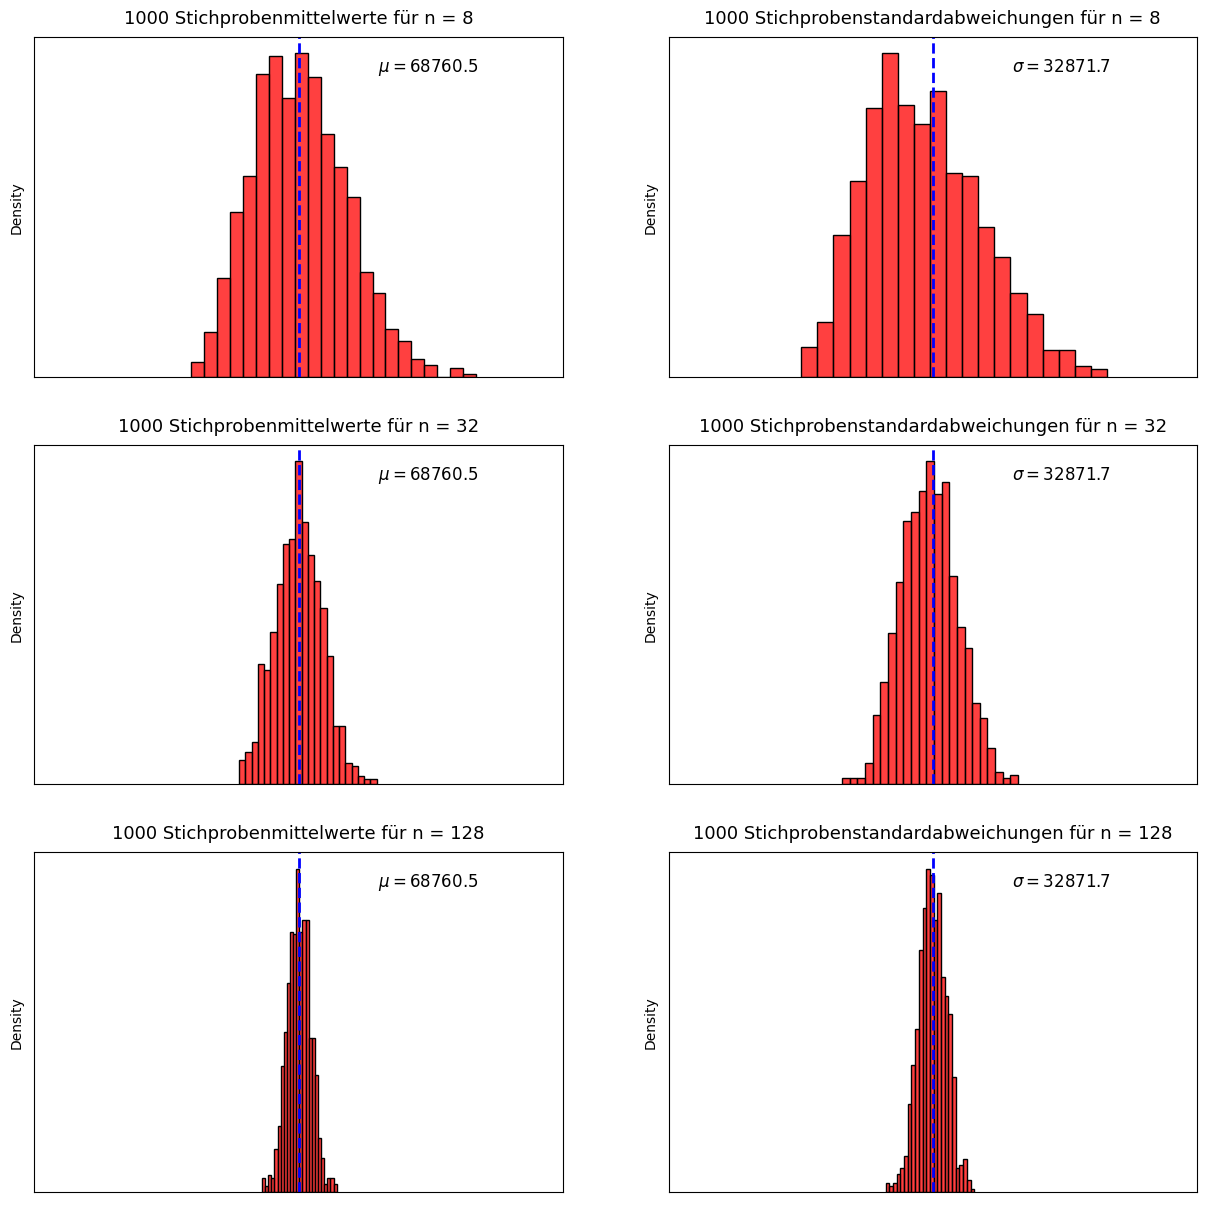

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_mu(schätzungen,mu,std,anz,axi):
    # alle Schätzungen in einem Dichtediagramm 
    sns.histplot(schätzungen,stat="density",color="red",ax = axi)

    # der Mittelwert der Grundgesamtheit
    axi.axvline(mu,color="blue",lw=2,linestyle="dashed")

    # gleicher Abschnitt auf der x-Achse
    axi.set_xlim(mu-2*std,mu+2*std)
    axi.text(0.65,0.9,r"$\mu=$"+"{m:1.1f}".format(m=mu),
                   fontsize=12,transform=plt.gca().transAxes)
    axi.set_title("1000 Stichprobenmittelwerte für n = " + anz,
                    fontsize=13,pad=10)
    axi.set_xlabel("")
    axi.set_xticks([])
    axi.set_yticks([])
    
def draw_std(schätzungen,mu,std,anz,axi):
    # alle Schätzungen in einem Dichtediagramm
    sns.histplot(schätzungen,stat="density",color="red",ax=axi)

    # die Standardabweichung der Grundgesamtheit
    axi.axvline(std,color="blue",lw=2,linestyle="dashed")
    
    # gleicher Abschnitt auf der x-Achse
    axi.set_xlim(std-1.5*std,std+1.5*std)
    
    axi.text(0.65,0.9,r"$\sigma=$"+"{m:1.1f}".format(m=std),
                   fontsize=12,transform=plt.gca().transAxes)
    axi.set_title("1000 Stichprobenstandardabweichungen für n = " + anz,
                   fontsize=13,pad=10)
    axi.set_xlabel("")
    axi.set_xticks([])
    axi.set_yticks([])

# Wahre Werte in der Grundgesamtheit
income_mu  = income["x"].mean()
income_std = income["x"].std(ddof=0) 

# Vergleiche 
fig = plt.figure(figsize=(15,15))


ax1 = fig.add_subplot(3,2,1)
draw_mu(sample_8["mu_hat"],income_mu,income_std,"8",ax1)
ax2 = fig.add_subplot(3,2,2)
draw_std(sample_8["std_hat"],income_mu,income_std,"8",ax2)

ax3 = fig.add_subplot(3,2,3)
draw_mu(sample_32["mu_hat"],income_mu,income_std,"32",ax3)
ax4 = fig.add_subplot(3,2,4)
draw_std(sample_32["std_hat"],income_mu,income_std,"32",ax4)

ax5 = fig.add_subplot(3,2,5)
draw_mu(sample_128["mu_hat"],income_mu,income_std,"128",ax5)
ax6 = fig.add_subplot(3,2,6)
draw_std(sample_128["std_hat"],income_mu,income_std,"128",ax6)

plt.show()

- Wir bestimmen **mit Resamples** basierend auf einer Stichprobe mit $n=128$ ein **95\%-** und ein **99\%-Konfidenzintervall** für den Mittelwert der Löhne.  

In [17]:
# eine Zufallsstichprobe mit n = 128
sample = np.random.choice(income["x"],size=128,replace=False)

In [18]:
def konfidenzintervall_mu(sample,anzahlResamples):
    # wir bestimmen für alle Resamples den Mittelwert
    resample_mu_hat = []
    for _ in range(anzahlResamples):
        mu_hat = np.random.choice(sample,size=128,replace=True).mean()
        resample_mu_hat.append(mu_hat)
    
    # wir sortieren diese Mittelwerte
    resample_mu_hat.sort()

    # wir teilen unten bei 2.5% und oben bei 97.5%
    konf_left_95 = np.quantile(resample_mu_hat,0.025)
    konf_right_95 = np.quantile(resample_mu_hat,0.975)

    # wir teilen unten bei 0.5% und oben bei 99.5%
    konf_left_99 = np.quantile(resample_mu_hat,0.005)
    konf_right_99 = np.quantile(resample_mu_hat,0.995)
    
    return ((konf_left_95,konf_right_95),(konf_left_99,konf_right_99)) 
    
konfidenzintervall_mu(sample,500)

((58268.378125, 67752.078125), (57086.9916796875, 68768.856640625))

Zur **Visualisierung der Konfidenzintervalle** zeichnen wir 200 Berechnungen:

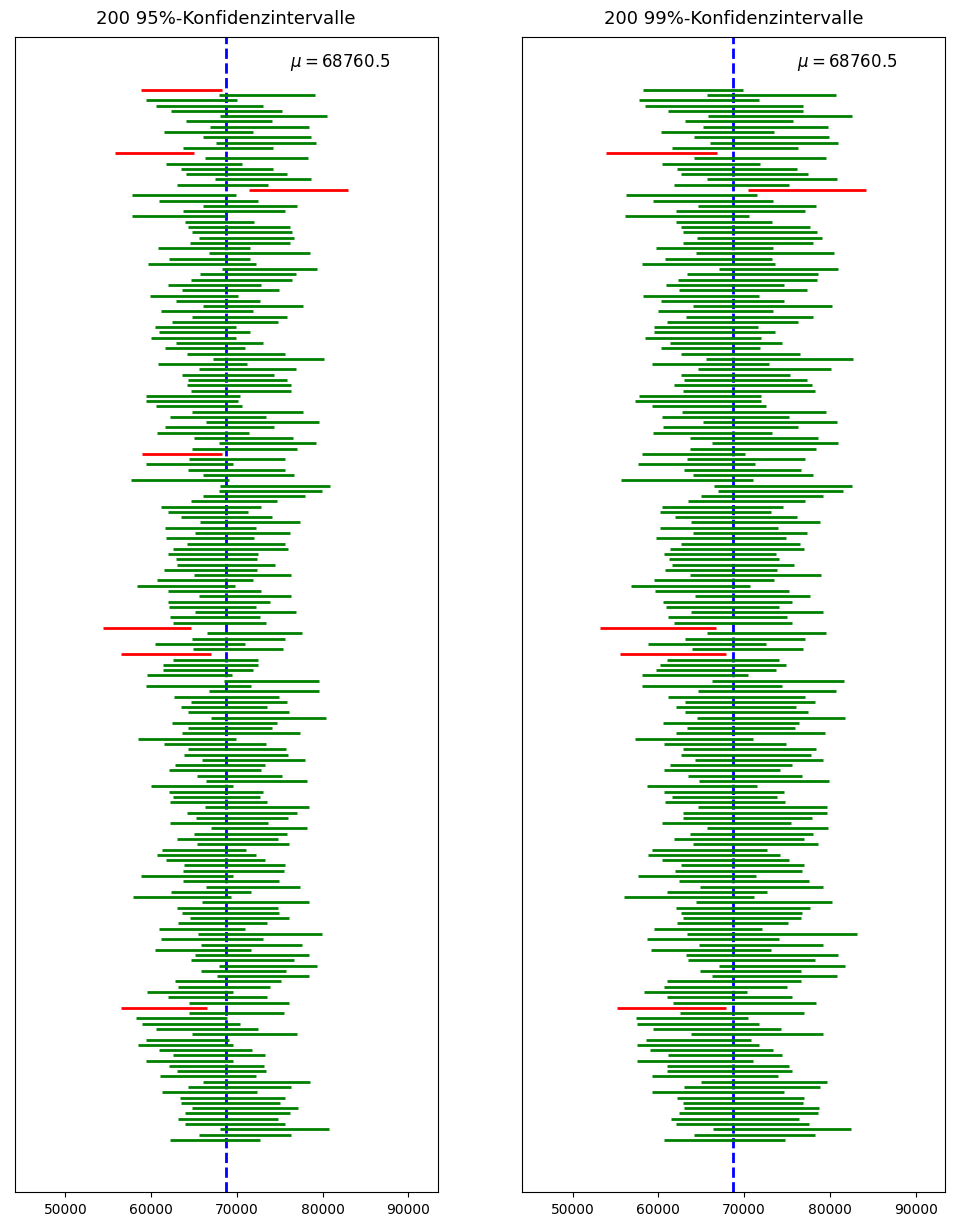

In [19]:
import matplotlib.pyplot as plt

left_95 = []
left_99 = []
right_95 = []
right_99 = []

for i in range(200):
    stichprobe = np.random.choice(income["x"],size=128,replace=False)
    k_95,k_99 = konfidenzintervall_mu(stichprobe,500)
    left_95.append(k_95[0])
    left_99.append(k_99[0])
    right_95.append(k_95[1])
    right_99.append(k_99[1])

fig = plt.figure(figsize=(12,15))

ax1 = fig.add_subplot(1,2,1)
ax1.axvline(income_mu,color="blue",lw=2,linestyle="dashed")
ax1.text(0.65,0.975,r"$\mu=$"+"{m:1.1f}".format(m=income_mu),
         fontsize=12,transform=plt.gca().transAxes)

for i in range(200):
    if left_95[i] > income_mu or right_95[i] < income_mu:
        ax1.hlines(i/10,left_95[i],right_95[i],lw=2,color="red")
    else:
        ax1.hlines(i/10,left_95[i],right_95[i],lw=2,color="green")

ax1.set_xlim(income_mu-0.75*income_std,income_mu+0.75*income_std)
ax1.set_title("200 95%-Konfidenzintervalle",
               fontsize=13,pad=10)
ax1.set_yticks([])

ax2 = fig.add_subplot(1,2,2)
ax2.axvline(income_mu,color="blue",lw=2,linestyle="dashed")
ax2.text(0.65,0.975,r"$\mu=$"+"{m:1.1f}".format(m=income_mu),
              fontsize=12,transform=plt.gca().transAxes)
for i in range(200):
    if left_99[i] > income_mu or right_99[i] < income_mu:
        ax2.hlines(i/10,left_99[i],right_99[i],lw=2,color="red")
    else:
        ax2.hlines(i/10,left_99[i],right_99[i],lw=2,color="green")
ax2.set_xlim(income_mu-0.75*income_std,income_mu+0.75*income_std)
ax2.set_title("200 99%-Konfidenzintervalle",
               fontsize=13,pad=10)
ax2.set_yticks([])

plt.show()

### <span style="color:rgb(160,0,86)">Aufgabe 3</span>

Laden Sie die Datei *Palette.sav* im Ordner Daten. In dieser Datei sind **Gewicht**, **Höhe** und **Breite** von 750 Hühnereiern, die von Hühnern der Rasse Loheimer Braun gelegt wurden. Nehmen Sie je 100  **Zufallsstichproben** vom Umfang Umfang $n=8$, $n=32$ und $n=128$ aus diesen Daten. 

- Schätzen Sie die wahren Mittelwerte und die wahren Standardabweichungen des Gewichts, der Höhe und der Bereite mit diesen Stichproben und vergleichen Sie diese Schätzungen mit den wahren Parametern.
- Bestimmen Sie mit Resamples basierend auf einer Stichprobe mit $n=128$ ein 95\%- und ein 99\%-Konfidenzintervall für die Mittelwerte und die Standardabweichungen. 

***

### <span style="color:rgb(160,0,86)">Lösungsvorschlag</span>

Hier müssen wir eine **.sav Datei** laden. Das sind SPSS-Datendateien. 

SPSS (***S**tatistical **P**ackage for the **S**ocial **S**ciences*) ist eine Software zur statistischen Datenanalyse, die ursprünglich für die ***Sozial- und Wirtschaftswissenschaften*** entwickelt wurde. Sie wird heute aber auch in Psychologie, Marketing, Medizin und vielen anderen Bereichen verwendet.

- Ab Pandas 2.0 ist das dirket Laden von **.sav Dateien** mit der Funktion **read_spss()** möglich.

In [20]:
import numpy as np
import pandas as pd

# pip install pyreadstat
eggs = pd.read_spss("Daten/Palette.sav")
eggs.head()

,Nummer,Breite,Höhe,Gewicht
0,10001.0,44.7,58.5,66.5
1,10002.0,44.0,60.1,65.5
2,10003.0,44.4,57.2,63.0
3,10004.0,43.3,59.2,64.5
4,10005.0,45.3,57.6,65.5


Nun erstellen wir **je 100 Stichproben der Grösse 8, 32 und 128**:

In [21]:
def samples(anzahlStichproben,n):
    # Spaltenüberschriften x_1, x_2, x_3, ... , x_n
    Samples = ["x"+str(i) for i in range(n)]
    
    # Dataframe für die Stichproben erstellen
    df_B = pd.DataFrame(columns=Samples)
    df_H = pd.DataFrame(columns=Samples)
    df_G = pd.DataFrame(columns=Samples)
    
    # In jeder Zeile eine neue Zufallsstichprobe speichern
    for i in range(anzahlStichproben):
        df_B.loc[i]= np.random.choice(eggs["Breite"],size=n,replace=True)
        df_H.loc[i]= np.random.choice(eggs["Höhe"],size=n,replace=True)
        df_G.loc[i]= np.random.choice(eggs["Gewicht"],size=n,replace=True)

    # Zu jeder Zufallsstichprobe die Punktschätzer berechnen
    df_B["mu_hat"]  = df_B[Samples].mean(axis=1)
    df_B["std_hat"] = df_B[Samples].std(axis=1,ddof=1)
    df_H["mu_hat"]  = df_H[Samples].mean(axis=1)
    df_H["std_hat"] = df_H[Samples].std(axis=1,ddof=1)
    df_G["mu_hat"]  = df_G[Samples].mean(axis=1)
    df_G["std_hat"] = df_G[Samples].std(axis=1,ddof=1)
    return (df_B,df_H,df_G)

sampleB_8, sampleH_8, sampleG_8 = samples(100,8)
sampleB_32, sampleH_32, sampleG_32 = samples(100,32)
sampleB_128, sampleH_128, sampleG_128 = samples(100,128)

sampleB_8.head()

,x0,x1,x2,x3,x4,x5,x6,x7,mu_hat,std_hat
0,44.3,46.2,45.2,44.1,46.2,44.1,46.1,45.7,45.2375,0.947082
1,43.2,44.4,43.0,43.6,43.9,44.6,46.4,45.0,44.2625,1.104455
2,43.8,44.8,44.0,42.2,44.0,44.5,44.4,43.6,43.9125,0.795411
3,43.1,43.8,44.1,44.9,44.9,45.1,44.5,45.1,44.4375,0.719002
4,42.2,44.3,44.3,43.1,41.4,46.0,46.2,42.6,43.7625,1.745965


Zur **Visualisierung der Punktschätzungen** zeichnen wir je ein Dichtediagramm für 
- die Stichprobenmittelwerte
- die Stichprobenstandardabweichungen

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_mu(schätzungen,mu,std,anz,axi):
    # alle Schätzungen in einem Dichtediagramm 
    sns.histplot(schätzungen,stat="density",color="red",ax = axi)

    # der Mittelwert der Grundgesamtheit
    axi.axvline(mu,color="blue",lw=2,linestyle="dashed")

    # gleicher Abschnitt auf der x-Achse
    axi.set_xlim(mu-2*std,mu+2*std)
    axi.text(0.65,0.9,r"$\mu=$"+"{m:1.1f}".format(m=mu),
                   fontsize=12,transform=plt.gca().transAxes)
    axi.set_title("100 Stichprobenmittelwerte für n = " + anz,
                    fontsize=13,pad=10)
    axi.set_xlabel("")
    axi.set_xticks([])
    axi.set_yticks([])
    
def draw_std(schätzungen,mu,std,anz,axi):
    # alle Schätzungen in einem Dichtediagramm
    sns.histplot(schätzungen,stat="density",color="red",ax=axi)

    # die Standardabweichung der Grundgesamtheit
    axi.axvline(std,color="blue",lw=2,linestyle="dashed")
    
    # gleicher Abschnitt auf der x-Achse
    axi.set_xlim(std-1.5*std,std+1.5*std)
    
    axi.text(0.65,0.9,r"$\sigma=$"+"{m:1.1f}".format(m=std),
                   fontsize=12,transform=plt.gca().transAxes)
    axi.set_title("100 Stichprobenstandardabweichungen für n = " + anz,
                   fontsize=13,pad=10)
    axi.set_xlabel("")
    axi.set_xticks([])
    axi.set_yticks([])

- Für die **Breite der Eier** finden wir:

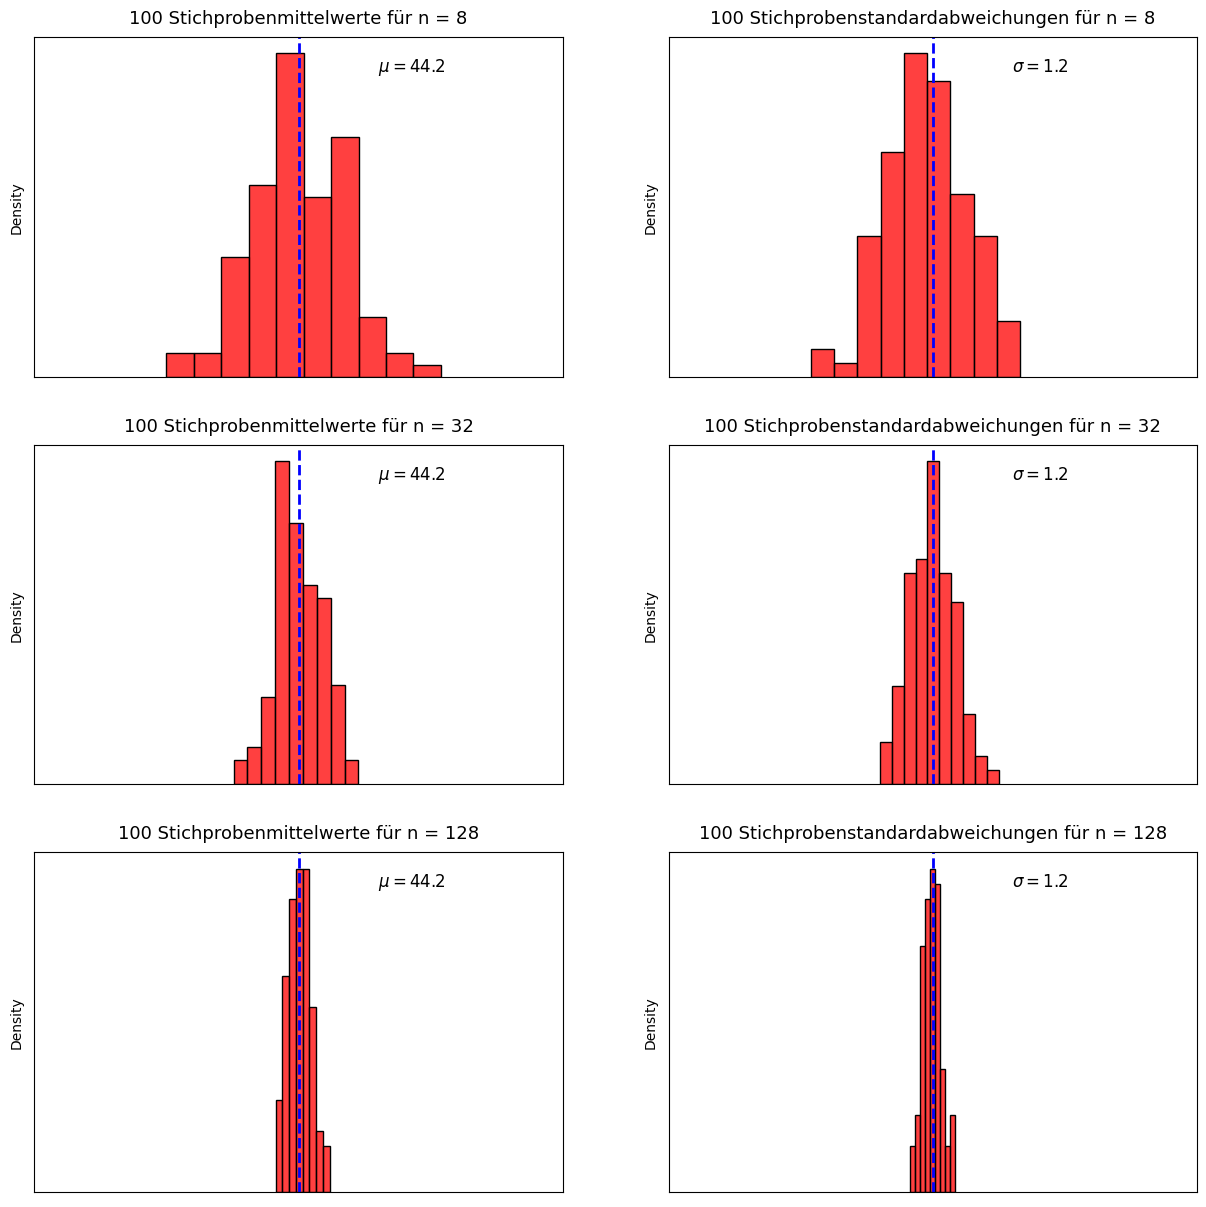

In [23]:
# Wahre Werte für die Breite in der Grundgesamtheit
eggsB_mu  = eggs["Breite"].mean()
eggsB_std = eggs["Breite"].std(ddof=0) 

# Vergleiche für die Breite
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3,2,1)
draw_mu(sampleB_8["mu_hat"],eggsB_mu,eggsB_std,"8",ax1)
ax2 = fig.add_subplot(3,2,2)
draw_std(sampleB_8["std_hat"],eggsB_mu,eggsB_std,"8",ax2)

ax3 = fig.add_subplot(3,2,3)
draw_mu(sampleB_32["mu_hat"],eggsB_mu,eggsB_std,"32",ax3)
ax4 = fig.add_subplot(3,2,4)
draw_std(sampleB_32["std_hat"],eggsB_mu,eggsB_std,"32",ax4)

ax5 = fig.add_subplot(3,2,5)
draw_mu(sampleB_128["mu_hat"],eggsB_mu,eggsB_std,"128",ax5)
ax6 = fig.add_subplot(3,2,6)
draw_std(sampleB_128["std_hat"],eggsB_mu,eggsB_std,"128",ax6)

plt.show()

- Für die **Höhe der Eier** finden wir:

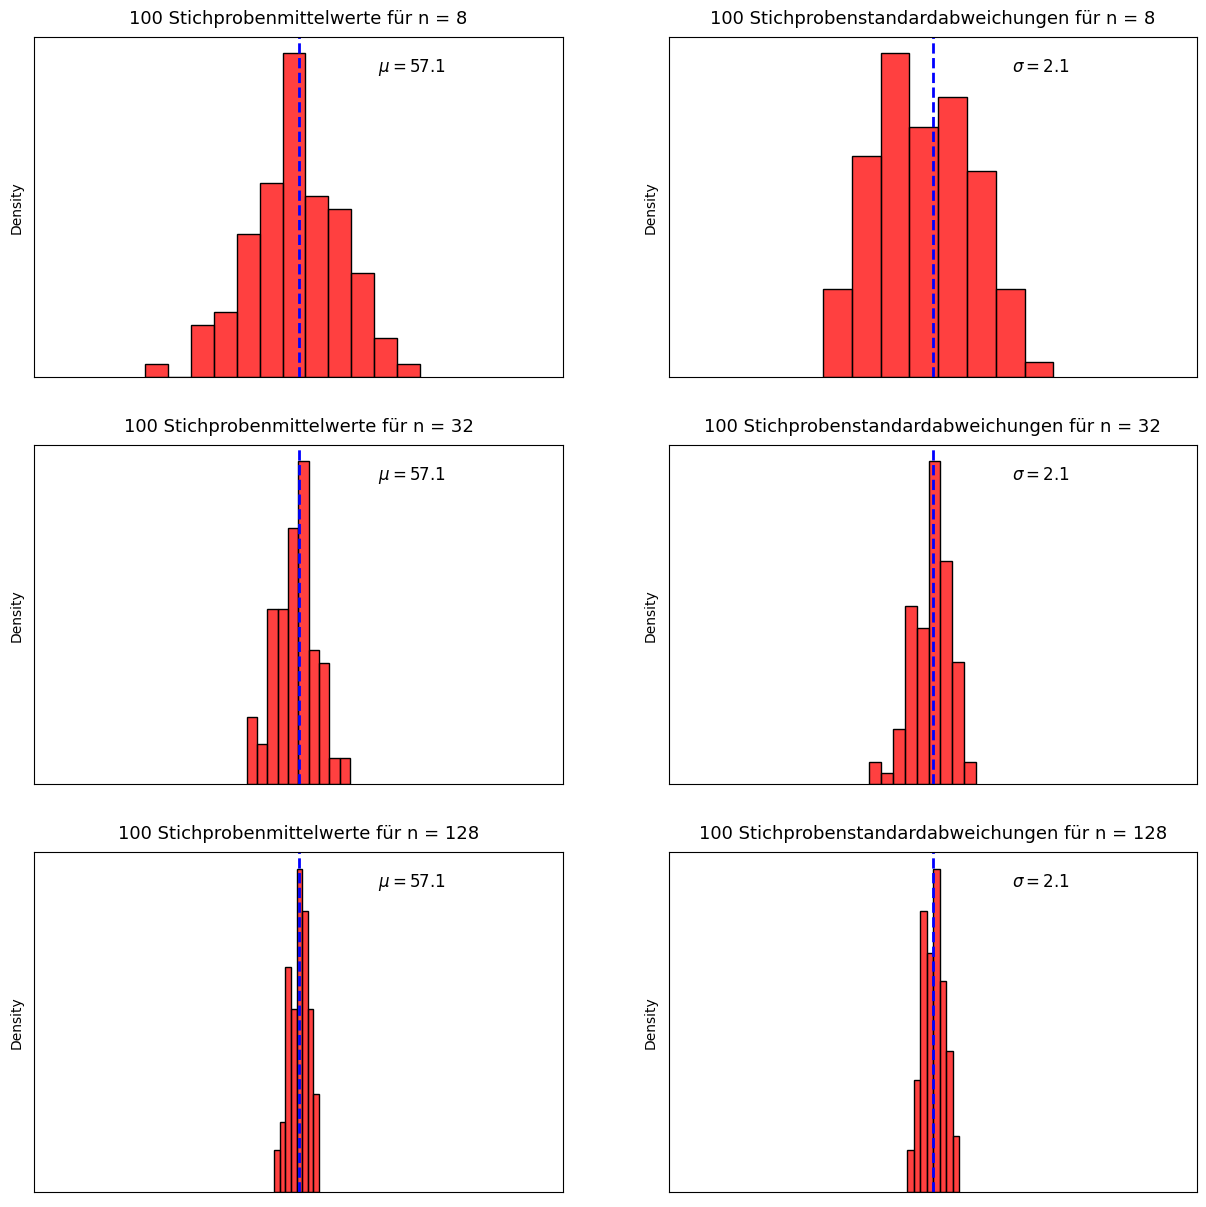

In [24]:
# Wahre Werte für die Höhe in der Grundgesamtheit
eggsH_mu  = eggs["Höhe"].mean()
eggsH_std = eggs["Höhe"].std(ddof=0) 

# Vergleiche für die Breite
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3,2,1)
draw_mu(sampleH_8["mu_hat"],eggsH_mu,eggsH_std,"8",ax1)
ax2 = fig.add_subplot(3,2,2)
draw_std(sampleH_8["std_hat"],eggsH_mu,eggsH_std,"8",ax2)

ax3 = fig.add_subplot(3,2,3)
draw_mu(sampleH_32["mu_hat"],eggsH_mu,eggsH_std,"32",ax3)
ax4 = fig.add_subplot(3,2,4)
draw_std(sampleH_32["std_hat"],eggsH_mu,eggsH_std,"32",ax4)

ax5 = fig.add_subplot(3,2,5)
draw_mu(sampleH_128["mu_hat"],eggsH_mu,eggsH_std,"128",ax5)
ax6 = fig.add_subplot(3,2,6)
draw_std(sampleH_128["std_hat"],eggsH_mu,eggsH_std,"128",ax6)

plt.show()

- Für das **Gewicht der Eier** finden wir:

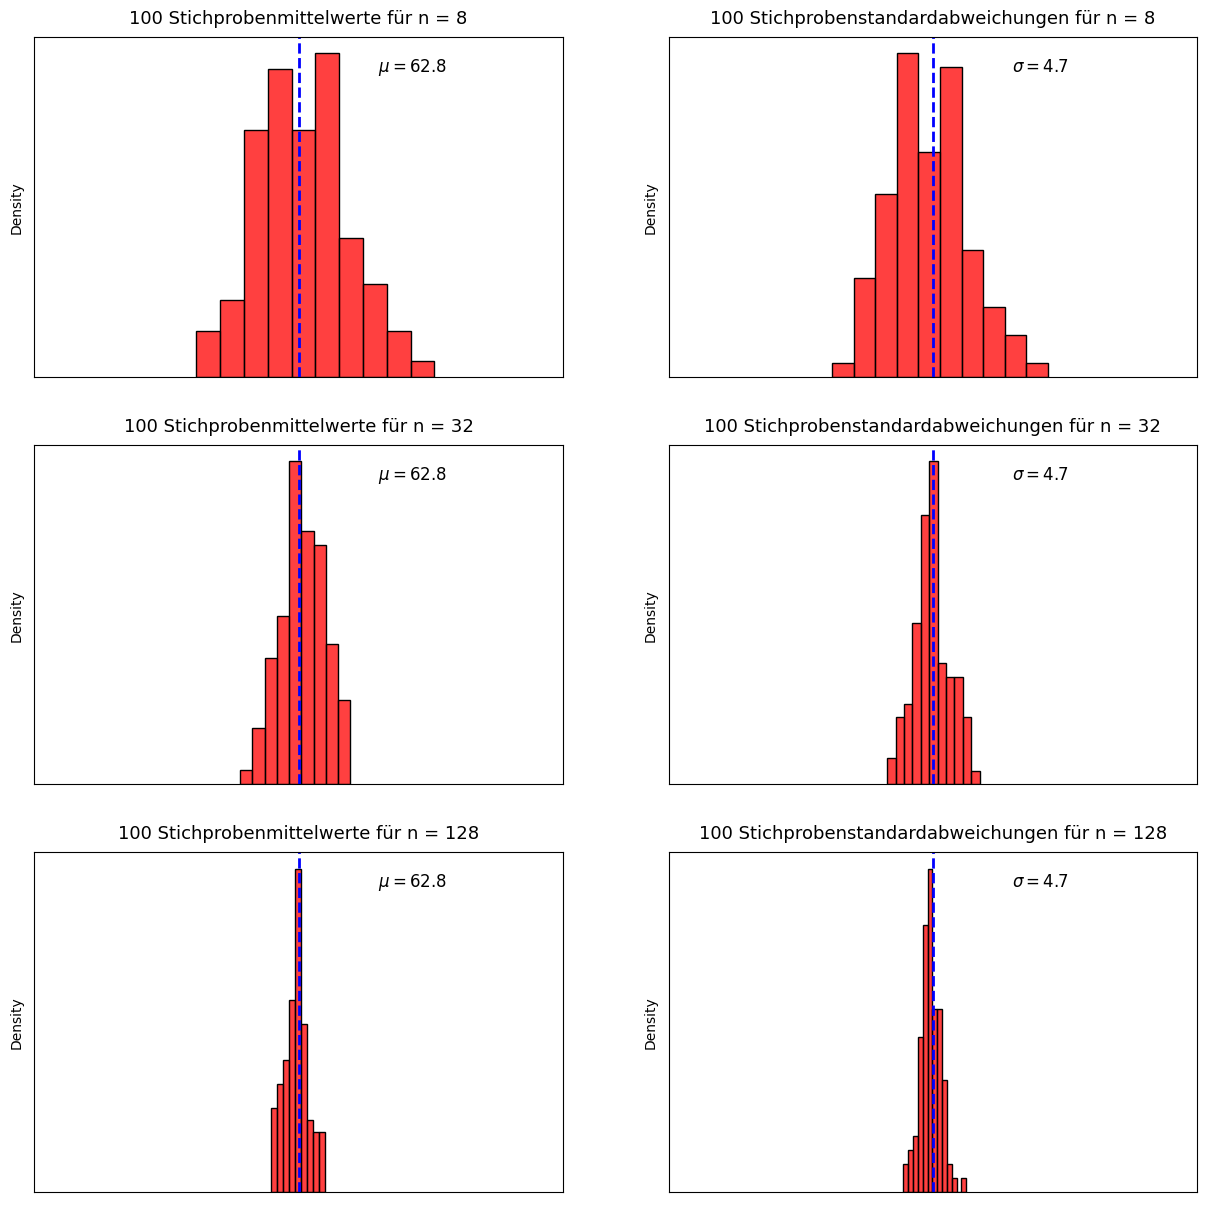

In [25]:
# Wahre Werte für die Gewicht in der Grundgesamtheit
eggsG_mu  = eggs["Gewicht"].mean()
eggsG_std = eggs["Gewicht"].std(ddof=0) 

# Vergleiche für die Breite
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3,2,1)
draw_mu(sampleG_8["mu_hat"],eggsG_mu,eggsG_std,"8",ax1)
ax2 = fig.add_subplot(3,2,2)
draw_std(sampleG_8["std_hat"],eggsG_mu,eggsG_std,"8",ax2)

ax3 = fig.add_subplot(3,2,3)
draw_mu(sampleG_32["mu_hat"],eggsG_mu,eggsG_std,"32",ax3)
ax4 = fig.add_subplot(3,2,4)
draw_std(sampleG_32["std_hat"],eggsG_mu,eggsG_std,"32",ax4)

ax5 = fig.add_subplot(3,2,5)
draw_mu(sampleG_128["mu_hat"],eggsG_mu,eggsG_std,"128",ax5)
ax6 = fig.add_subplot(3,2,6)
draw_std(sampleG_128["std_hat"],eggsG_mu,eggsG_std,"128",ax6)

plt.show()

- Wir bestimmen **mit Resamples** basierend auf einer Stichprobe mit $n=128$ ein **95\%-** und ein **99\%-Konfidenzintervall** für den Mittelwert der Löhne.  

In [26]:
sampleB = np.random.choice(eggs["Breite"],size=128,replace=False)
sampleH = np.random.choice(eggs["Höhe"],size=128,replace=False)
sampleG = np.random.choice(eggs["Gewicht"],size=128,replace=False)

In [27]:
def konfidenzintervall_mu(sample,anzahlResamples):
    # wir bestimmen für alle Resamples den Mittelwert
    resample_mu_hat = []
    for _ in range(anzahlResamples):
        mu_hat = np.random.choice(sample,size=128,replace=True).mean()
        resample_mu_hat.append(mu_hat)
    
    # wir sortieren diese Mittelwerte
    resample_mu_hat.sort()

    # wir teilen unten bei 2.5% und oben bei 97.5%
    konf_left_95 = np.quantile(resample_mu_hat,0.025)
    konf_right_95 = np.quantile(resample_mu_hat,0.975)

    # wir teilen unten bei 0.5% und oben bei 99.5%
    konf_left_99 = np.quantile(resample_mu_hat,0.005)
    konf_right_99 = np.quantile(resample_mu_hat,0.995)
    
    return ((konf_left_95,konf_right_95),(konf_left_99,konf_right_99)) 

def konfidenzintervall_std(sample,anzahlResamples):
    # wir bestimmen für alle Resamples den Mittelwert
    resample_std_hat = []
    for _ in range(anzahlResamples):
        std_hat = np.random.choice(sample,size=128,replace=True).std(ddof=1)
        resample_std_hat.append(std_hat)
    
    # wir sortieren diese Mittelwerte
    resample_std_hat.sort()

    # wir teilen unten bei 2.5% und oben bei 97.5%
    konf_left_95 = np.quantile(resample_std_hat,0.025)
    konf_right_95 = np.quantile(resample_std_hat,0.975)

    # wir teilen unten bei 0.5% und oben bei 99.5%
    konf_left_99 = np.quantile(resample_std_hat,0.005)
    konf_right_99 = np.quantile(resample_std_hat,0.995)
    
    return ((konf_left_95,konf_right_95),(konf_left_99,konf_right_99))

- Für die **Breite der Eier** finden wir:

In [29]:
konf_mu = konfidenzintervall_mu(sampleB,800)
print("95%-Konfidenzintervall für mu:",konf_mu[0])
print("99%-Konfidenzintervall für mu:",konf_mu[1])
print()
konf_std = konfidenzintervall_std(sampleB,800)
print("95%-Konfidenzintervall für std:",konf_std[0])
print("99%-Konfidenzintervall für std:",konf_std[1])

95%-Konfidenzintervall für mu: (44.01091796875, 44.40716796875)
99%-Konfidenzintervall für mu: (43.96715625, 44.455468749999994)

95%-Konfidenzintervall für std: (1.0290707969610715, 1.2683957149256946)
99%-Konfidenzintervall für std: (0.9993976718768445, 1.2984014783462972)


- Für die **Höhe der Eier** finden wir:

In [30]:
konf_mu = konfidenzintervall_mu(sampleH,800)
print("95%-Konfidenzintervall für mu:",konf_mu[0])
print("99%-Konfidenzintervall für mu:",konf_mu[1])
print()
konf_std = konfidenzintervall_std(sampleH,800)
print("95%-Konfidenzintervall für std:",konf_std[0])
print("99%-Konfidenzintervall für std:",konf_std[1])

95%-Konfidenzintervall für mu: (56.86087890625001, 57.579746093749996)
99%-Konfidenzintervall für mu: (56.7710703125, 57.63615625)

95%-Konfidenzintervall für std: (1.8375017685989852, 2.3266905323620537)
99%-Konfidenzintervall für std: (1.75237251896925, 2.3641824131330442)


- Für das **Gewicht der Eier** finden wir:

In [31]:
konf_mu = konfidenzintervall_mu(sampleG,800)
print("95%-Konfidenzintervall für mu:",konf_mu[0])
print("99%-Konfidenzintervall für mu:",konf_mu[1])
print()
konf_std = konfidenzintervall_std(sampleG,800)
print("95%-Konfidenzintervall für std:",konf_std[0])
print("99%-Konfidenzintervall für std:",konf_std[1])

95%-Konfidenzintervall für mu: (62.3460546875, 63.79701171875)
99%-Konfidenzintervall für mu: (62.07408203125, 64.03850390625)

95%-Konfidenzintervall für std: (3.859036036634384, 4.846794917043335)
99%-Konfidenzintervall für std: (3.6332452824789234, 4.9492105161671605)


![HSLU](Bilder/LogoHSLU.png)